In [1]:

import pandas as pd
import gensim

In [2]:
df = pd.read_csv('IA3-1.csv')
df

,description,Maker_Model
0,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series M
1,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series
2,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series
3,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series
4,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series
...,...,...
11909,"premium unleaded (required),AUTOMATIC,all whee...",Acura ZDX
11910,"premium unleaded (required),AUTOMATIC,all whee...",Acura ZDX
11911,"premium unleaded (required),AUTOMATIC,all whee...",Acura ZDX
11912,"premium unleaded (recommended),AUTOMATIC,all w...",Acura ZDX


In [3]:
## convert data to list of lists
tag = [row.split(',') for row in df['description']]
tag

[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Compact',
  'Convertible',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Serie

In [4]:
model = gensim.models.Word2Vec(tag, min_count = 1, vector_size = 50, workers = 3, window = 3, sg = 1)

In [5]:
model.wv.__getitem__('Toyota Camry')

array([ 2.24753637e-02,  1.06959447e-01,  3.82282510e-02, -1.01512119e-01,
       -6.38984293e-02, -2.06287071e-01,  9.02207475e-03,  2.58444458e-01,
       -1.03334814e-01, -5.86664267e-02,  3.14518213e-02, -4.63428441e-05,
        1.04993783e-01, -9.25013423e-03, -2.47604419e-02,  1.73037007e-01,
        1.33187339e-01,  2.87006557e-01, -1.11718990e-01, -2.40968436e-01,
       -6.72345906e-02, -4.47013937e-02,  2.25826278e-01,  7.09957555e-02,
        1.91153303e-01,  1.40620731e-02, -4.19155397e-02,  3.72022152e-01,
       -3.65443975e-02,  1.22350967e-02,  7.97229446e-03,  1.75761543e-02,
        4.55770530e-02,  3.59366904e-03,  7.44740665e-02, -1.18446052e-01,
        1.62197620e-01, -5.04689403e-02,  4.87273484e-02,  4.80200872e-02,
        9.42365006e-02, -1.72668528e-02, -1.90010965e-01,  6.68639615e-02,
        3.07700217e-01,  3.94729897e-02,  2.20110994e-02, -1.46508843e-01,
       -1.18827205e-02,  2.56525818e-02], dtype=float32)

In [6]:
model.wv.similarity('Porsche 718 Cayman', 'Nissan Van')

0.82226384

In [7]:
model.wv.most_similar('Mercedes-Benz SLK-Class')[:5]

[('Audi S3', 0.9921175241470337),
 ('BMW ALPINA B7', 0.9884710311889648),
 ('Nissan GT-R', 0.9875259399414062),
 ('Audi S6', 0.9859219193458557),
 ('Bentley Continental Supersports', 0.9849863052368164)]

In [8]:
# t-distributed stochastic neighborhood embeddings

cars = df['Maker_Model'].unique().tolist() 
cars_50 = cars[0:50]


In [9]:
from sklearn.manifold import TSNE

In [10]:
X = model.wv.__getitem__(cars_50)
tsne_model = TSNE(perplexity = 5, n_components = 2, init = 'pca', n_iter = 1000, random_state = 100)
Y = tsne_model.fit_transform(X)

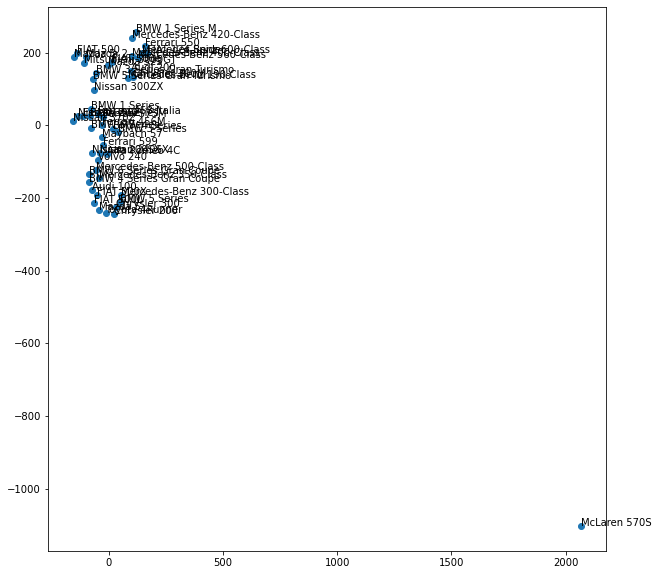

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(Y[:, 0], Y[:, 1])
for i, author in enumerate(cars_50):
    plt.annotate(author, xy=(Y[i, 0], Y[i, 1]))
plt.savefig("tsne-quotes.png")
plt.show()